In [29]:
import matplotlib.pyplot
import numpy as np
import pandas
import matplotlib.pyplot
import sys
import matplotlib.pyplot as plt

In [30]:
csv = pandas.read_csv("train.csv")

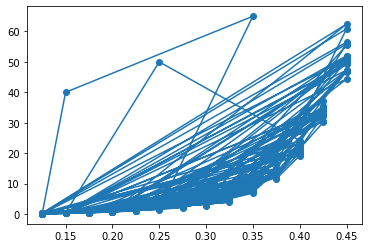

In [31]:
matplotlib.pyplot.plot(csv.X, csv.Y, '-o')

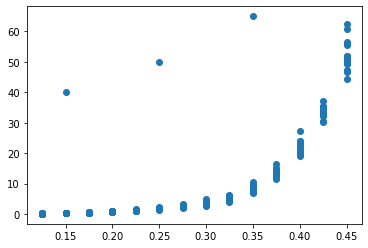

In [33]:
matplotlib.pyplot.scatter(csv.X, csv.Y)

In [37]:
x = np.linspace(0, 1, 100)
print(x)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [ ]:
class Regression:

    def __init__(self):
        self._t0 = 1
        self._t1 = 1

    def calc_function(self, x):
        # t1 * x^5 + t2
        return self._t0 * x**6 + self._t1

    def derivative_t0(self, x, y, y_predicted):
        return -(2 / len(x)) * sum(6 * x * (y - y_predicted))

    def derivative_t1(self, y, y_predicted):
        return -(2 / len(y)) * sum(y - y_predicted)

    def mean_squared_error(self, y_true, y_predicted):
        # Calculating the loss or cost
        cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
        return cost

    def root_mean_squared_error(self, y_true, y_predicted):
        return self.mean_squared_error(y_true, y_predicted) ** 0.5

In [ ]:
def gradient_descent(self, x, y, iterations=12000, learning_rate=0.2,
                         stopping_threshold=1e-6, validation_data=None):
        self._t0 = 0.1
        self._t1 = 0.01

        validation_best_t0 = self._t0
        validation_best_t1 = self._t1
        validation_best_cost = 1000

        n = float(len(x))

        costs = []
        weights = []
        previous_cost = None

        for i in range(iterations):

            y_predicted = self.calc_function(x)

            current_cost = self.root_mean_squared_error(y, y_predicted)

            if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
                break

            if validation_data is not None:
                valid_y_predicted = self.calc_function(validation_data.X)
                validation_current_cost = self.root_mean_squared_error(validation_data.Y, valid_y_predicted)

                if validation_current_cost < validation_best_cost:
                    validation_best_cost = validation_current_cost
                    validation_best_t0 = self._t0
                    validation_best_t1 = self._t1

            previous_cost = current_cost

            costs.append(current_cost)
            weights.append(self._t0)

            # Calculating the gradients
            t0_derivative = self.derivative_t0(x, y, y_predicted)
            t1_derivative = self.derivative_t1(y, y_predicted)

            # Updating weights and bias
            self._t0 = self._t0 - (learning_rate * t0_derivative)
            self._t1 = self._t1 - (learning_rate * t1_derivative)

            # Printing the parameters for each 1000th iteration
            # print(f"Iteration {i + 1}: Cost: {current_cost:<10.5} t0: {self._t0:<10.5} t1: {self._t1:<10.5}")

        # Visualizing the weights and cost at for all iterations
        # plt.figure(figsize=(8, 6))
        # plt.plot(weights, costs)
        # plt.scatter(weights, costs, marker='o', color='red')
        # plt.title("Cost vs Weights")
        # plt.ylabel("Cost")
        # plt.xlabel("Weight")
        # plt.show()
        # print("Current cost: " + str(current_cost))

        if validation_data is not None:
            print("Valid-C-Cost:", validation_current_cost, " | Valid-Best-Cost", validation_best_cost )
            self._t0 = validation_best_t0
            self._t1 = validation_best_t1

        return self._t0, self._t1

In [ ]:


    
            outliers.append(i)

    csv.drop(index=csv.index[outliers], axis=0, inplace=True)


def split_tvt(dataset, validate=0.15, test=0):
    # random = np.random.randint(1, 10000)
    random = 800
    validate = dataset.sample(frac=validate, random_state=random)
    dataset = dataset.drop(validate.index)

    test = dataset.sample(frac=test, random_state=random)
    dataset = dataset.drop(test.index)

    train = dataset
    return [train, validate, test]


def main(argv):
    train_file = "train.csv"
    test_file = "test_preview.csv"
    if len(argv) >= 2:
        train_file = argv[0]
        test_file = argv[1]

    train_data = pandas.read_csv(train_file)
    test_data = pandas.read_csv(test_file)
    remove_outliers(train_data)

    # train_data, va, te = split_tvt(train_data)

    # plt.scatter(train_data.X, train_data.Y)

    reg = Regression()
    reg.gradient_descent(train_data.X, train_data.Y, validation_data=None)
    # reg.plot_function(0, 0.4)

    # rmse = reg.root_mean_squared_error(te.Y, reg.calc_function(te.X))
    # print(rmse)

    rmse = reg.root_mean_squared_error(test_data.Y, reg.calc_function(test_data.X))
    print(rmse)

    # plt.show()



if __name__ == '__main__':
    main(sys.argv[1:])
